# Boston House Price Prediction

> End-to-end notebook with EDA, feature engineering, model training, evaluation, and deployment notes.

## Objectives
- Explore the Boston Housing dataset and understand relationships to PRICE.
- Prepare data (train/test split and scaling).
- Train a linear regression model and evaluate it with standard metrics.
- Save the trained scaler and model for use in a Flask app.
- Capture observations and reasoning at each step for clarity.

## Dataset
We use `boston.csv` which contains 13 features and the target `PRICE` (median value of owner-occupied homes in $1000s).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("boston.csv")

### Load data
We load the dataset into a DataFrame. Ensure the `boston.csv` file exists in the project root.

In [3]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Preview and schema
We preview the first few rows and inspect the schema to understand data types and potential issues (e.g., nulls).

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
## Summarizing the stats of the data
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
## Check the missing values
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [7]:
### Exploratory Data Analysis
## Correlation

dataset.corr() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### Correlation and EDA
We compute pairwise correlations and visualize patterns. Notable expectations:
- `RM` positively correlates with `PRICE`.
- `LSTAT` negatively correlates with `PRICE`.
- `CHAS` may have a small effect (binary).
We also look at scatter plots and simple regression lines for key pairs.

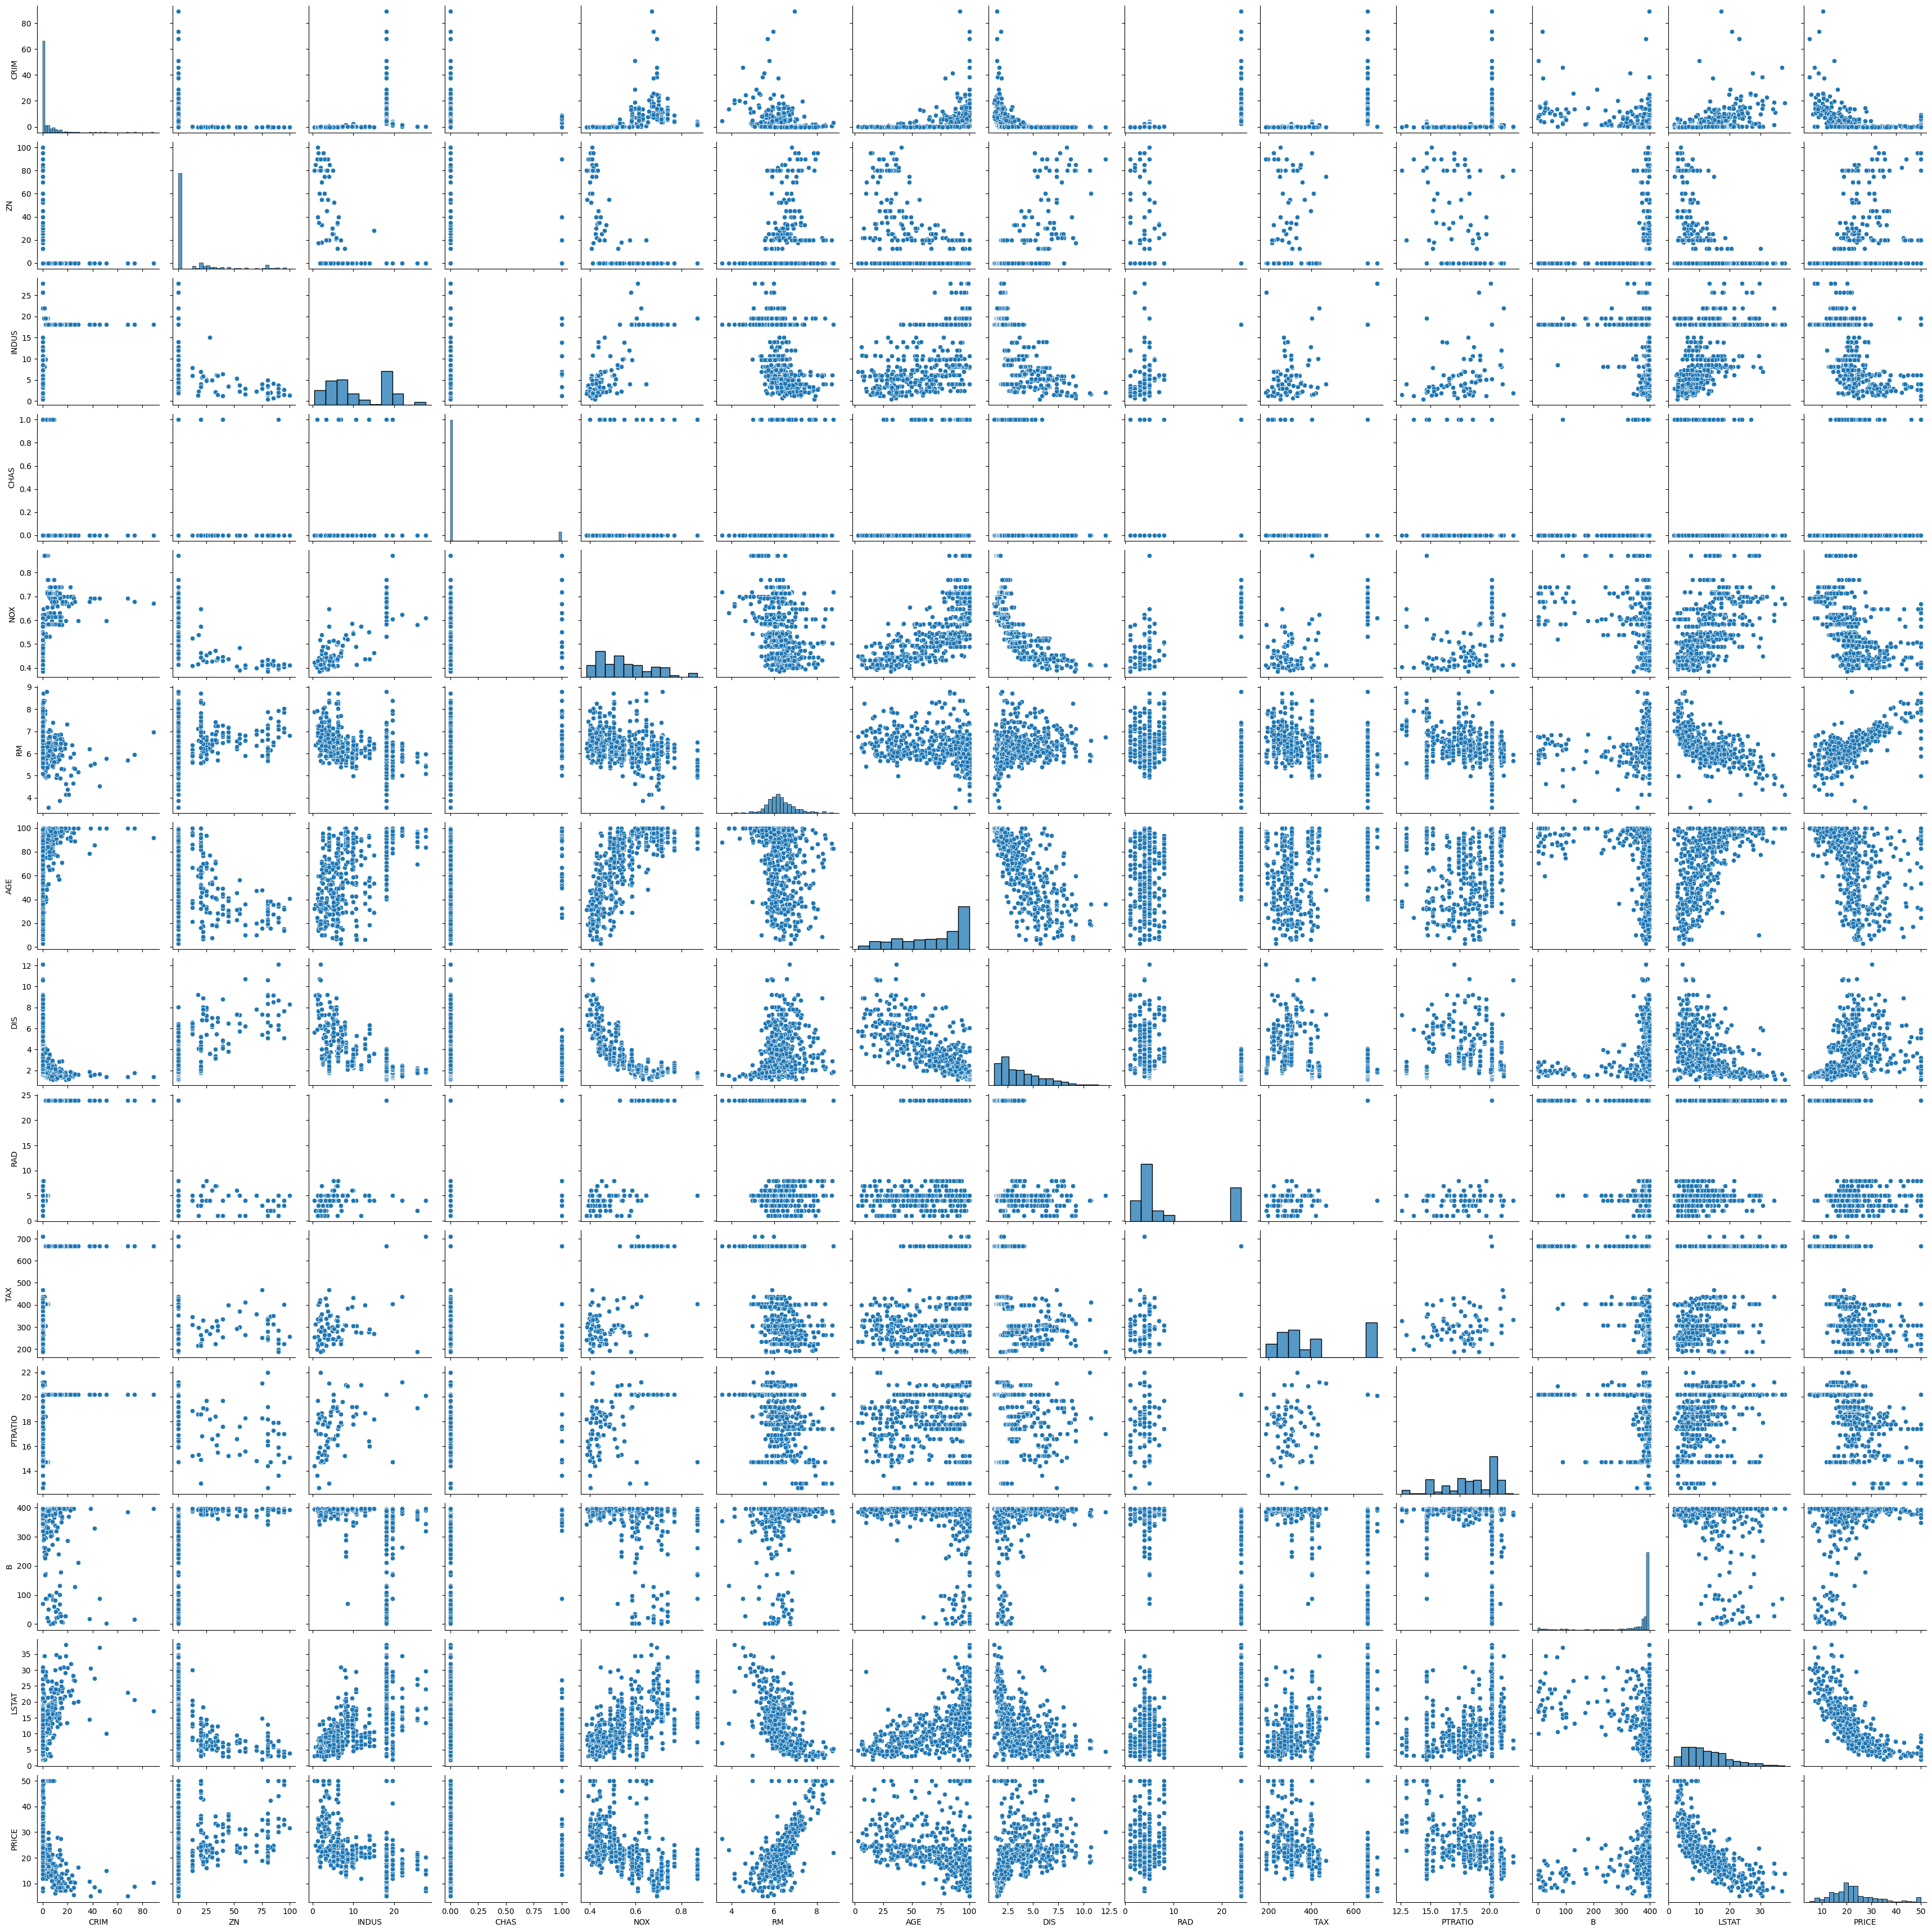

In [9]:
import seaborn as sns
sns.pairplot(dataset)

Text(0, 0.5, 'Price')

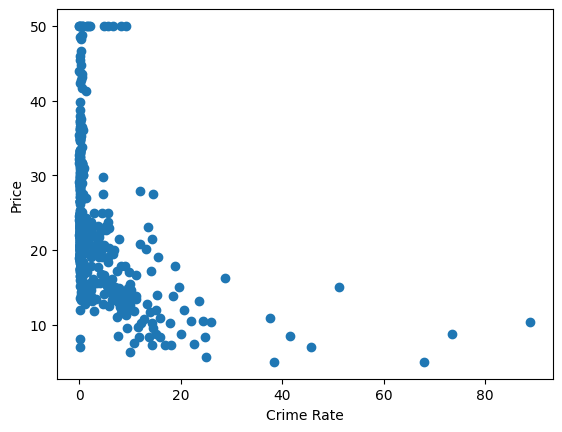

In [10]:
plt.scatter(dataset["CRIM"], dataset["PRICE"])
plt.xlabel("Crime Rate")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

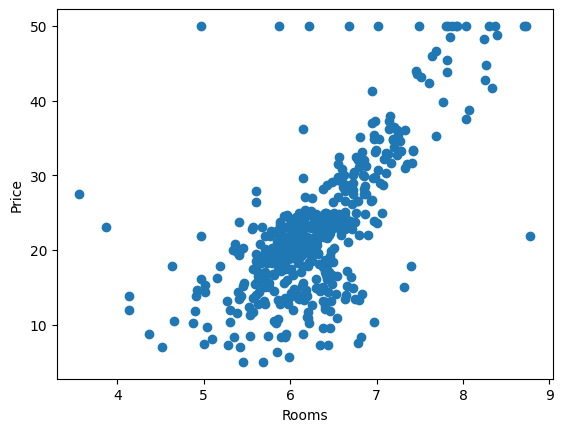

In [11]:
plt.scatter(dataset["RM"], dataset["PRICE"])
plt.xlabel("Rooms")
plt.ylabel("Price")

<Axes: xlabel='RM', ylabel='PRICE'>

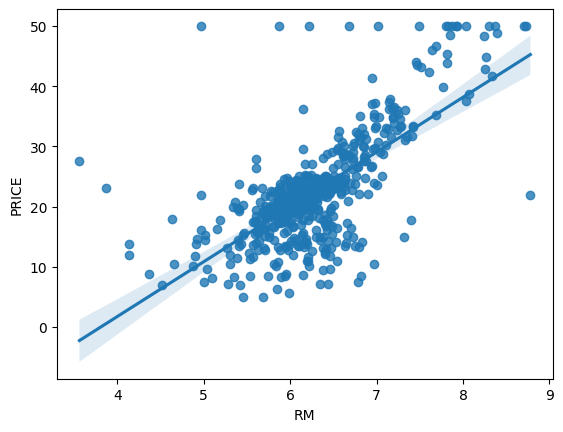

In [12]:
sns.regplot(x="RM", y="PRICE", data=dataset)

<Axes: xlabel='LSTAT', ylabel='PRICE'>

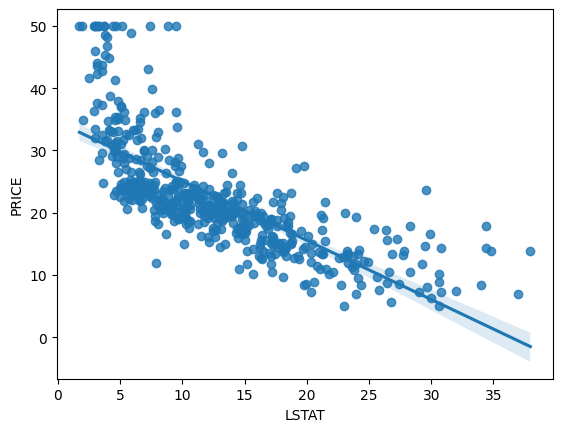

In [13]:
sns.regplot(x="LSTAT", y="PRICE", data=dataset)

<Axes: xlabel='CHAS', ylabel='PRICE'>

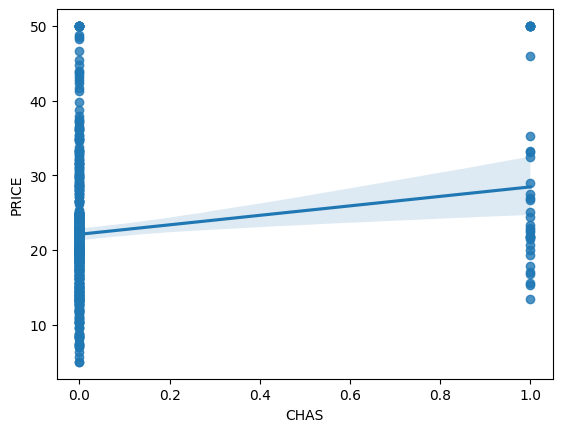

In [14]:
sns.regplot(x="CHAS", y="PRICE", data=dataset)

<Axes: xlabel='PTRATIO', ylabel='PRICE'>

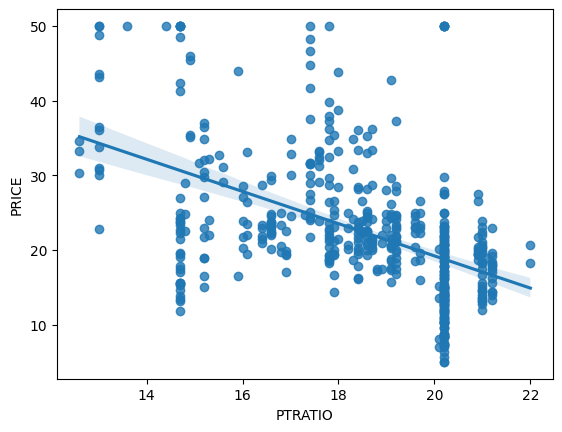

In [15]:
sns.regplot(x="PTRATIO", y="PRICE", data=dataset)

In [16]:
## Independent adn Dependent features
X = dataset.drop("PRICE", axis=1)
y = dataset["PRICE"]

### Features and target
We define the feature matrix `X` (all columns except `PRICE`) and the target vector `y` (the `PRICE` column).

In [17]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Train–test split
We split the data into train and test sets (70/30 split) to evaluate generalization.

In [18]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [19]:
y_train

5      28.7
116    21.2
45     19.3
16     23.1
468    19.1
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: PRICE, Length: 354, dtype: float64

In [20]:
## Stanardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

### Scaling
We standardize features using `StandardScaler`. The scaler is fit on training data and applied to both train and test sets to prevent data leakage.

In [21]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
import pickle
pickle.dump(scaler, open("scaling.pkl", "wb"))

In [22]:
X_train, X_test

(array([[-0.41425879, -0.50512499, -1.29214218, ...,  0.18727079,
          0.39651419, -1.01531611],
        [-0.40200818, -0.50512499, -0.16208345, ..., -0.21208981,
          0.3870674 , -0.05366252],
        [-0.39721053, -0.50512499, -0.60948856, ..., -0.16771641,
          0.42854113, -0.31132373],
        ...,
        [-0.41604586,  3.03838247, -1.3166773 , ..., -0.56707702,
          0.35987906, -0.90549329],
        [ 0.92611293, -0.50512499,  1.00549958, ...,  0.8528718 ,
         -2.87841346,  1.52750437],
        [-0.39030549, -0.50512499, -0.37135358, ...,  1.16348561,
         -3.32828832, -0.25218837]], shape=(354, 13)),
 array([[-0.406801  , -0.50512499, -1.02225586, ..., -0.74457062,
          0.41241246, -0.47605794],
        [-0.41105674,  1.26662874, -0.68165068, ..., -0.30083661,
          0.42854113, -1.25185755],
        [-0.4051199 , -0.50512499,  2.39678516, ...,  0.8084984 ,
          0.35031705,  0.79535229],
        ...,
        [-0.35439903, -0.50512499, -0

### Model Training
We train a Linear Regression model on the standardized training set.

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
regression = LinearRegression()

In [26]:
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
## print the coeffifients
regression.coef_

array([-1.10834602,  0.80843998,  0.34313466,  0.81386426, -1.79804295,
        2.913858  , -0.29893918, -2.94251148,  2.09419303, -1.44706731,
       -2.05232232,  1.02375187, -3.88579002])

In [28]:
## Print the intercept
regression.intercept_

np.float64(23.01581920903955)

In [29]:
## on which parameters the model has been trained
regression.get_params

<bound method BaseEstimator.get_params of LinearRegression()>

In [30]:
## Prediction with test data
reg_pred = regression.predict(X_test)

### Predictions
We generate predictions on the test set for evaluation.

In [39]:
reg_pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

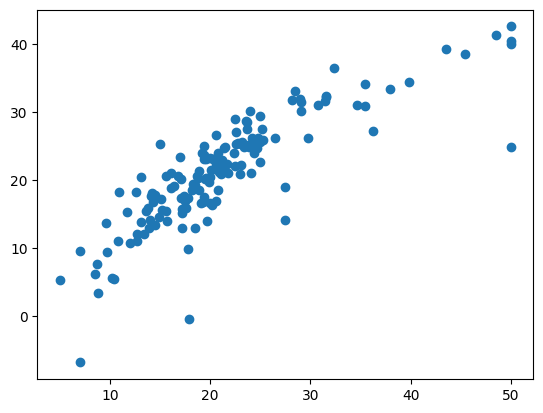

In [40]:
## plot the sccatter plot for the prediction
plt.scatter(y_test, reg_pred)

In [41]:
residual = y_test-reg_pred

In [42]:
residual

173    -5.048960
274    -4.095014
491    -1.811193
72     -2.603213
452    -2.755280
         ...    
441    -0.303672
23      1.114059
225    10.016575
433    -2.382863
447    -5.685618
Name: PRICE, Length: 152, dtype: float64

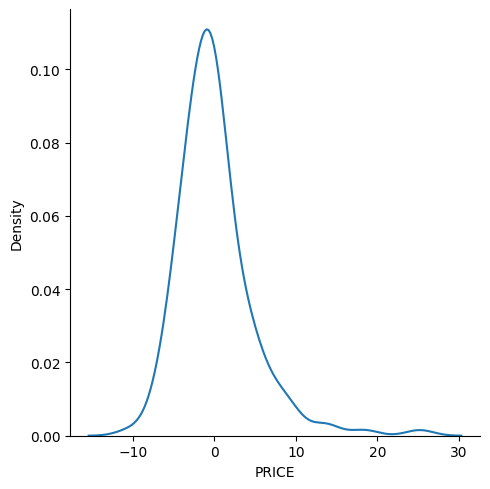

In [43]:
## Prediction with residual
sns.displot(residual, kind="kde")

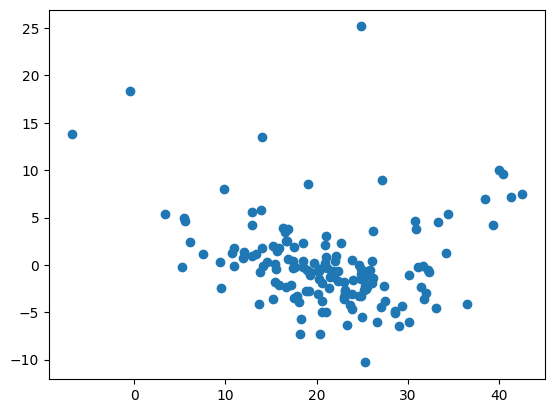

In [45]:
## Scatter plot with respect to prediction adn residual
## uniform distribution
plt.scatter(reg_pred, residual)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, reg_pred)
rmse = np.sqrt(mean_squared_error(y_test, reg_pred))
r2 = r2_score(y_test, reg_pred)

n = len(y_test)
p = X_train.shape[1]
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

print("MAE:", mae)
print("RMSE:", rmse)
print("R^2:", r2)
print("Adjusted R^2:", adj_r2)

3.1627098714574053
3.1627098714574053
1.778400931021294


In [ ]:
# R^2 and Adjusted R^2 are computed in the previous cell.
# Below we format them nicely for display if needed.
print(f"Formatted R^2: {r2:.4f}")
print(f"Formatted Adjusted R^2: {adj_r2:.4f}")

In [64]:
X_train[0].reshape(1, -1)

array([[-0.41425879, -0.50512499, -1.29214218, -0.28154625, -0.85108479,
         0.14526384, -0.365584  ,  1.08162833, -0.74617905, -1.11279004,
         0.18727079,  0.39651419, -1.01531611]])

In [65]:
regression.predict(X_train[0].reshape(1, -1))

array([25.28876411])

### Pickling The Model file For Deployment

### Model persistence
We persist both the scaler and the trained regression model to pickle files for deployment in the Flask app (`app.py`).

In [66]:
import pickle

In [68]:
pickle.dump(regression, open("regression.pkl", "wb"))

In [69]:
pickle_model = pickle.load(open("regression.pkl", "rb"))

In [70]:
pickle_model.predict(X_train[0].reshape(1, -1))

array([25.28876411])

## Observations and Conclusions
- `RM` shows a positive relationship with `PRICE`, while `LSTAT` has a negative relationship, consistent with literature.
- Scaling improves numerical stability for linear models when feature magnitudes differ significantly.
- The linear regression model provides a baseline; consider regularized models (Ridge/Lasso) to handle multicollinearity.
- Next steps: cross-validation, hyperparameter tuning, model comparison, and feature importance analysis.

## Deployment Notes
- Flask app expects feature inputs in the following order: `CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT`.
- Use the saved `scaling.pkl` and `regression.pkl` files in `app.py`.
- The `/predict_api` endpoint accepts JSON: `{ "data": { <feature>: <value>, ... } }`.